<a href="https://colab.research.google.com/github/tanvirarafin/2020-ectf-insecure-example/blob/master/example_sim_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#upload the library
from google.colab import files
uploaded = files.upload()

Saving 180nm.lib to 180nm (1).lib


In [ ]:
!pip install pyspice
!sudo add-apt-repository ppa:kicad/kicad-5.1-releases -y
!sudo apt-get update
!sudo apt-get install libngspice-kicad


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:11 http://ppa.launchpad.net/kicad/kicad-5.1-releases/ubuntu bionic InRelease [15.9 kB]
Get:13 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()
from PySpice.Spice.NgSpice.Shared import NgSpiceShared

In [ ]:
ngspice = NgSpiceShared.new_instance()
print(ngspice.exec_command('version -f'))# this should print

2020-09-24 14:26:13,945 - PySpice.Spice.NgSpice.Shared.NgSpiceShared._send_char - WARNING - spinit was not found
2020-09-24 14:26:13,946 - PySpice.Spice.NgSpice.Shared.NgSpiceShared._send_char - ERROR - Note: can't find init file.
******
** ngspice-30 : Circuit level simulation program
** The U. C. Berkeley CAD Group
** Copyright 1985-1994, Regents of the University of California.
** Please get your ngspice manual from http://ngspice.sourceforge.net/docs.html
** Please file your bug-reports at http://ngspice.sourceforge.net/bugrep.html
** Creation Date: Wed Feb 27 13:04:52 UTC 2019
**
** CIDER 1.b1 (CODECS simulator) included
** XSPICE extensions included
** Relevant compilation options (refer to user's manual):
** OpenMP multithreading for BSIM3, BSIM4 enabled
** X11 interface not compiled into ngspice
**
******


In [ ]:
def simulate(circuit):
    ngspice.load_circuit(circuit)
    print('Loaded circuit:')
    print(ngspice.listing())

    ngspice.run()
    print('Plots:', ngspice.plot_names)
    plot = ngspice.plot(simulation=None, plot_name=ngspice.last_plot)
    return plot

In [ ]:
circuit= '''
*simple RC ckt
.options savecurrents

R1 1 2 1k
C1 2 3 5p
C2 3 gnd 1p
VIN 1 gnd PULSE(0 5 1NS 1NS 1NS 20NS 100NS)

.tran 0.1n 200n UIC

.end
'''

In [ ]:
plot_1 = simulate(circuit)

Loaded circuit:
*simple rc ckt
2 : .global gnd
4 : r1 1 2 1k
5 : c1 2 3 5p
6 : c2 3 0 1p
7 : vin 1 0 pulse(0 5 1ns 1ns 1ns 20ns 100ns)
8 : .tran 0.1n 200n uic
3 : .options savecurrents
10 : .end
2020-09-24 14:39:42,307 - PySpice.Spice.NgSpice.Shared.NgSpiceShared._send_char - WARNING - Warning: vin: no DC value, transient time 0 value used
Plots: ['tran10', 'tran9', 'tran8', 'tran7', 'tran6', 'tran5', 'tran4', 'tran3', 'tran2', 'tran1', 'const']


In [ ]:
print(plot_1)

{'@c2[i]': variable: @c2[i] current, '@c1[i]': variable: @c1[i] current, '@r1[i]': variable: @r1[i] current, 'vin#branch': variable: vin#branch current, 'V(3)': variable: V(3) voltage, 'V(2)': variable: V(2) voltage, 'V(1)': variable: V(1) voltage, 'time': variable: time time}


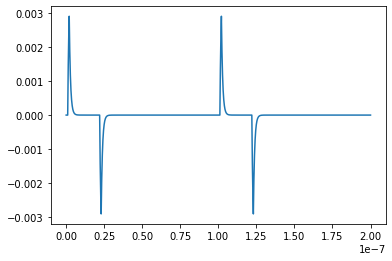

In [ ]:
plt.plot(plot_1['time']._data,plot_1['@c2[i]']._data)

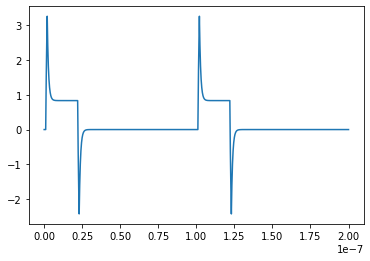

In [ ]:
plt.plot(plot_1['time']._data,plot_1['V(1)']._data - plot_1['V(3)']._data)

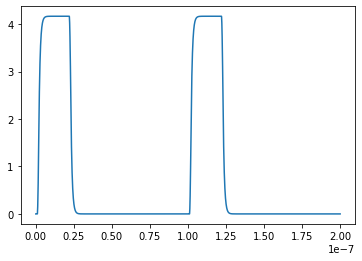

In [ ]:
plt.plot(plot_1['time']._data,plot['V(3)']._data)

In [ ]:
# mosfet inverter
mos_ckt = '''
* SPICE3 file created from cinverter.ext - technology: scmos
.model pfet pmos level = 49 version = 3.3.0
.model nfet nmos level = 49 version = 3.3.0
.option scale=1u
.OPTIONS ABSTOL=1N VNTOL=1M.

M1000 out in vdd vdd pfet w=8 l=2
+  ad=40 pd=26 as=40 ps=26
M1001 out in gnd gnd nfet w=4 l=2
+  ad=20 pd=18 as=20 ps=18
C0 out gnd 3.2fF
C1 in gnd 7.7fF

v1 vdd gnd 5
vin in gnd pulse(0 5 10n 0.1n 0.1n 30n 60n)

.tran 5n 70n

.end
'''

In [ ]:
plot = simulate(mos_ckt)

In [ ]:
plt.plot(plot['time']._data,plot['in']._data)

In [ ]:
plt.plot(plot['time']._data,plot['out']._data)

In [ ]:
mos_ckt = '''
* SPICE file
.include 180nm.lib
.option scale=1u
.options savecurrents

V1 Vdd 0 1.8
V6 Vtau 0 0.4

V2 Vthr 0 200m
V3 Vb1 0 1

C1 Vmem 0 100p
Rload out 0 100k

Iin Vdd Vmem PULSE(500n 0.1n 0 0 0 10u 20u)

M5 N001 N001 Vdd Vdd pmos l=0.5 w=1.2 ad=1.2 as=1.2 pd=4.4 ps=4.4
M6 N002 N001 Vdd Vdd pmos l=0.5 w=1.2 ad=1.2 as=1.2 pd=4.4 ps=4.4
M8 N001 Vmem N004 N004 nmos l=0.5 w=0.6 ad=0.6 as=0.6 pd=3.2 ps=3.2
M9 N002 Vthr N004 N004 nmos l=0.5 w=0.6 ad=0.6 as=0.6 pd=3.2 ps=3.2
M10 N004 Vb1 0 0 nmos l=0.5 w=0.6 ad=0.6 as=0.6 pd=3.2 ps=3.2

Mreset Vmem out 0 0 nmos l=0.5 w=0.6 ad=0.6 as=0.6 pd=3.2 ps=3.2
M7 N003 N002 0 0 nmos l=0.5 w=0.6 ad=0.6 as=0.6 pd=3.2 ps=3.2
M18 out N003 0 0 nmos l=0.5 w=0.6 ad=0.6 as=0.6 pd=3.2 ps=3.2
M19 N003 N002 Vdd Vdd pmos l=0.5 w=1.2 ad=1.2 as=1.2 pd=4.4 ps=4.4
M20 out N003 Vdd Vdd pmos l=0.5 w=1.2 ad=1.2 as=1.2 pd=4.4 ps=4.4
Mleak Vmem Vtau 0 0 nmos l=0.5 w=0.6 ad=0.6 as=0.6 pd=3.2 ps=3.2

.tran 0.01u 500u UIC


.end
'''

In [ ]:
plot = simulate(mos_ckt)

In [ ]:
plt.plot(plot['time']._data,plot['vmem']._data)
plt.plot(plot['time']._data,plot['out']._data)